# Excercise: transient channels

This notebook contains an excercise to help you understand transient channels. 

* We will be using the channel toy (see previous lessons) to look at the behaviour of a river in response to changing uplift. 
* We then will look at how this modifies the chi profile. 
* We will then look at a real channel network and let you draw some conclusions about the history of uplift in that location. 

## Before we start: install and import some stuff

In [1]:
!pip install channeltoy ipympl

     |████████████████████████████████| 2.0 MB 1.6 MB/s eta 0:00:01


In [2]:
%matplotlib widget
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interactive
import channeltoy as ct
import matplotlib.pyplot as plt
import numpy as np

## Part 1: Simple channel profile

Lets create an initial channel and then change the uplift rate. Simply execute (shift-enter) the following cell and then play around with `K` and the `initial_U` (which is initial uplift in m/yr) to see how steep a channel is.  

Note: the script fixes the vertical axis. If it is too big or too small go into the cell and change the line that sets the limits:

`ax.set_ylim([0, 2000])`

In [8]:
plt.rcParams['figure.figsize'] = [10, 5]

def plot_channel_SS(K = 0.00005, initial_U = 0.0002, basin_length = 10000 ):
    """Remove old lines from plot and plot new one"""
    #[l.remove() for l in ax.lines]

      
    chan = ct.channeltoy(spacing=250, U = initial_U, K = K, n=1, m= 0.45, maximum_x = basin_length-999, X_0 = basin_length)
    initial_elevation = chan.solve_steady_state_elevation()
    x = chan.x_data
    chi = chan.chi_data
    
    
    
    #print(x)
    #print(initial_elevation)
    fig, ax = plt.subplots()
    plt.plot(x, initial_elevation,label="Initial elevation")
    plt.xlabel("Distance from outlet (m)")
    plt.ylabel("Elevation (m)")
    ax.set_ylim([0, 2000])
    plt.legend()
     
interactive_plot = interactive(plot_channel_SS, 
                               K=(0.000001, 0.0001, 0.000005), 
                               initial_U=(0.0001, 0.001, 0.0001),
                               basin_length=(5000,100000,5000)
                              )

output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=5e-05, description='K', max=0.0001, min=1e-06, step=5e-06), FloatSlide…

## Part 2: A transient channel

This next bit of code sets up an interactive transient channel. 

* It starts with a steady-state channel profile.
* You then increase the erosion rate.
* A knickpoint will develop and will move upslope as you increase the end time.
* Play around a bit to see how fast it moves!

Again, you don't need to adjust anything in the code. Just click on the box and then shift-enter and it will give you an interactive plot. 
Under the hood is a numerical model so you will need to wait a little while each time you change a parameter. 

In [12]:
def plot_channel(K = 0.00005, initial_U = 0.0002, new_U = 0.0005 ,end_time = 50000,basin_length = 10000 ):
    """Remove old lines from plot and plot new one"""
    #[l.remove() for l in ax.lines]
    
    chan = ct.channeltoy(spacing=250, U = initial_U, K = K, 
                         n=1, m= 0.45,
                         maximum_x = basin_length-999, X_0 = basin_length)
    
    initial_elevation = chan.solve_steady_state_elevation()
    x = chan.x_data
    chi = chan.chi_data
    
    # change the uplift rate
    chan.set_U_values(U = new_U)
    
    times, elevations = chan.transient_simulation(base_level = 0, dt = 200, 
                                              start_time = 0, end_time = end_time+1, 
                                              print_interval = end_time)
    
    #print(times)
    #print(elevations)
    
    plt.plot(x, initial_elevation,label="Initial elevation")
    plt.plot(x, elevations[-1],label = "Time is: "+str(times[-1]))
    plt.xlabel("Distance from outlet (m)")
    plt.ylabel("Elevation (m)")
    plt.legend()
     
interactive_plot = interactive(plot_channel, 
                               K=(0.000001, 0.0001, 0.000005), 
                               initial_U=(0.0001, 0.001, 0.0001),
                               new_U=(0.0001, 0.001, 0.0001),
                               end_time =(10000, 500000, 10000),
                               basin_length=(5000,100000,5000))

output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(FloatSlider(value=5e-05, description='K', max=0.0001, min=1e-06, step=5e-06), FloatSlide…

## Part 3: A transient channel in chi-elevation space

We have explained in class and in some of the previous lessons that slope-area data is has been used to see where channel steepness changes. But this kind of data can be quite noisy. See Lessons 5 and 6. It is easier to see where the knickpoint is using a chi transformation. 

The chi transformation basically squashes the channel at large drainage areas and stretches it at small drainage areas so that, in a steady state landscape, the chi-elevation profile becomes a straight line. 

In chi ($\chi$)-elevation space, the steeper the profile, the higher the steepness index. 

Use the chi profiles below to see where the knickpoint is. Hopefully you can see why this is a little bit easier than using the profiles. 

In [13]:
def plot_channel_chi(K = 0.00005, initial_U = 0.0002, new_U = 0.0005 ,end_time = 50000, basin_length = 10000):
    """Remove old lines from plot and plot new one"""
    #[l.remove() for l in ax.lines]
    
    chan = ct.channeltoy(spacing=100, U = initial_U, K = K, n=1, m= 0.45,
                         maximum_x = basin_length-999, X_0 = basin_length)
    initial_elevation = chan.solve_steady_state_elevation()
    x = chan.x_data
    chi = chan.chi_data
    
    # change the uplift rate
    chan.set_U_values(U = new_U)
    
    times, elevations = chan.transient_simulation(base_level = 0, dt = 200, 
                                              start_time = 0, end_time = end_time+1, 
                                              print_interval = end_time)
    
    plt.plot(chi, initial_elevation,label="Initial elevation")
    plt.plot(chi, elevations[-1],label = "Time is: "+str(times[-1]))
    plt.xlabel("Chi ($\chi$) (m)")
    plt.ylabel("Elevation (m)")
    plt.legend()
    
    return plt.gca()
     
interactive_plot = interactive(plot_channel_chi, 
                               K=(0.000001, 0.0001, 0.000005), 
                               initial_U=(0.0001, 0.001, 0.0001),
                               new_U=(0.0001, 0.001, 0.0001),
                               end_time =(10000, 500000, 10000),
                               basin_length=(5000,100000,5000))

output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(FloatSlider(value=5e-05, description='K', max=0.0001, min=1e-06, step=5e-06), FloatSlide…

## Optional: showing the knickpoint without the interactive plot

You could also plot everything at once, instead of using the interactive plots, to see how fast the knickpoint moves, using the code below. You will need to change the parameters in the code. 

K is: 5e-05
U is: 0.0001
U is: 0.0005

Saving this timestep: 0.0
Time is: 5000.0 
Saving this timestep: 10000.0
Time is: 15000.0 
Saving this timestep: 20000.0
Time is: 25000.0 
Saving this timestep: 30000.0
Time is: 35000.0 
Saving this timestep: 40000.0
Time is: 45000.0 
Saving this timestep: 50000.0
Time is: 55000.0 
Saving this timestep: 60000.0
Time is: 65000.0 
Saving this timestep: 70000.0
Time is: 70000.0 

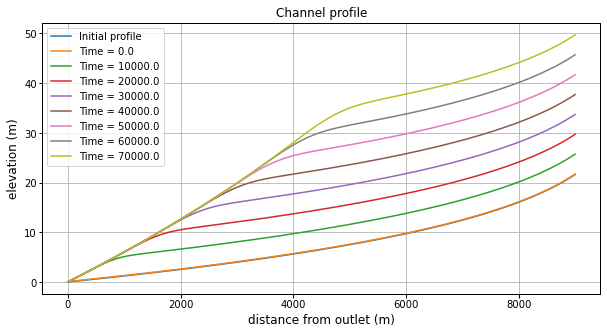

In [15]:
##
## IF YOU WANT TO CHANGE THE PLOT
## Change these parameters
##
basin_length = 10000
initial_U = 0.0001
new_U = 0.0005
this_K = 0.00005
print_every_this_many_years = 10000
last_year_your_print_a_profile = 70000
do_you_want_to_plot_in_chi_space = False       # True or False

# create a channel
chan = ct.channeltoy(spacing=50, U = initial_U, K = 0.00005, n=1, m= 0.45,maximum_x = basin_length-999, X_0 = basin_length)
initial_elevation = chan.solve_steady_state_elevation()

# change the uplift rate
chan.set_U_values(U = new_U)

# Run the transient simulation. You can use the start and end time to 
times, elevations = chan.transient_simulation(base_level = 0, dt = 200, 
                                              start_time = 0, end_time = last_year_your_print_a_profile+1, 
                                              print_interval = print_every_this_many_years)

# Make a plot of the elevations
# If you set use_chi=True then you get the chi profiles. 
chan.plot_transient_channel(times = times, 
                            elevations = elevations, 
                            initial_elevation = initial_elevation,
                            show_figure=True,print_to_file=False,use_chi = do_you_want_to_plot_in_chi_space)

## Your assigment

**Assessment Part 1: Tuning K**

* You will need a combination of Google Earth and this website: https://earth.uow.edu.au/ 
* On the https://earth.uow.edu.au/ website, click on the "CRN international river basins" layer. 
    * Find a mountain range you like that has a basin. 
    * Click on the basin: it will have an erosion rate in mm/kyr. Divide by 1000000 to get the erosion rate in m/yr. So 1000 mm/yr will be 0.001 m/yr. 
* Now go onto google earth and find the distance from the mountain front (where the slopes get steep, not the plains) to the peaks, and write down the relief. 

Use the widget in part 1 to tune the value of K so that you have around the correct relief in the channel (the channel will probably be a few hundred metres lower than the peak).

**What you do for the assignment**:

Write 3-5 sentences about the mountain you chose and how you calculated the erodibility. You should include a figure. Scientific figures don't have titles: you should have an explanation of the figure in a figure caption. See any scientific paper for examples of how to do this.

**Assessment Part 2: Transience in this landscape**

What happens if the uplift rate were to increase in this landscape? How long would it take the mountain range to adjust?
Below are some broad questions. You can address a subset of these (see below).

* Change the uplift rate.
* How long does it take for the knickpoint to move through the landscape?
* Does this change if the uplift rate is faster? Either the initial rate or the final rate?
* Does this change with changing K values?
* Does the knickpoint migration rate change with changing length of the channel?

**What you do for the assignment**:

Prepare 2-3 figures to answer some of the questions above. Then write no more than 500 words about your findings. This should look like a small discussion section in a paper. Start with a few sentences explaining what you are simulating (that is, don't assume the reader already knows everything about knickpoints and channels). Then explain what simulations you performed (by simulations we just mean changing the parameters in the plots above), and then use the figures to explain what you found. We are looking for your ability to explain what you have done and your findings, so you really could focus on one of the above questions and still do well on the assigment. Answering all the above questions will probvably result in a worse mark since you will not have the space to explain what you have done. Again, the figures should be in the format of a scientific paper: use figure captions instead of titles. 